In [114]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### loading the data set 
Loading the data set using pandas module and viewing a few records. You can download the data set from https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
*   About the data set 
    *   This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

*   Fields description follow:
    *   preg = Number of times pregnant
    *   plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    *   pres = Diastolic blood pressure (mm Hg)
    *   skin = Triceps skin fold thickness (mm)
    *   test = 2-Hour serum insulin (mu U/ml)
    *   mass = Body mass index (weight in kg/(height in m)^2)
    *   pedi = Diabetes pedigree function
    *   age = Age (years)
    *   class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [115]:
df = pd.read_csv('data/diabetes.csv')
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


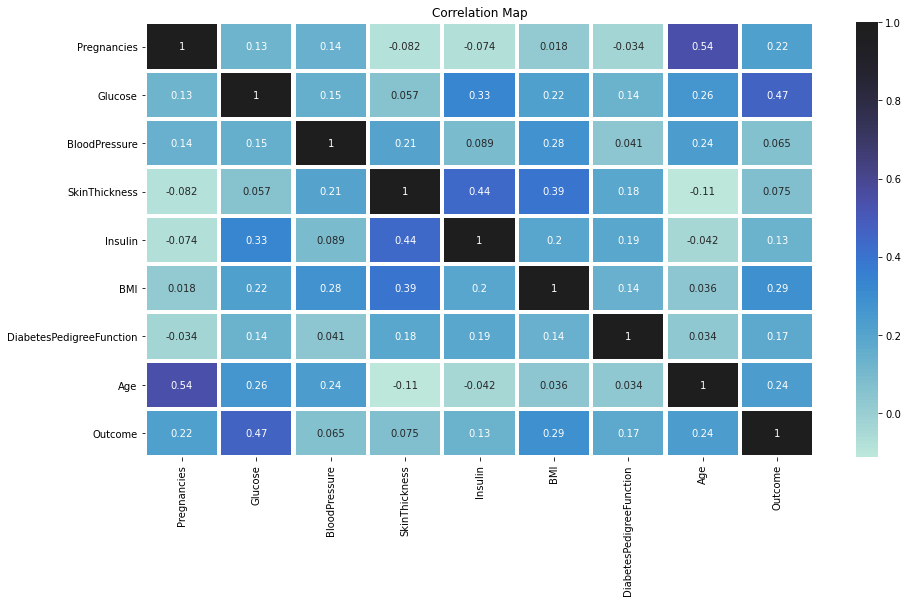

In [118]:
#Heatmap
plt.figure(figsize=(15,8))
plt.title('Correlation Map')
ax=sns.heatmap(df.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

In [119]:
# converting diabetes predigree function 
def mkdiabcat(data):
    if data<0.24:
        return 'lowa'
    if data>= 0.24 and data < 0.37:
        return 'mediuma'
    if data>= 0.37 and data <= 0.62:
        return 'higha'
    if data > 0.62:
        return 'very higha'
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(mkdiabcat) 

In [120]:
# converting age column 
def mkagecat(data):
    if data >15 and data <= 40:
        return 'lowb'
    if data >40 and data <= 60:
        return 'mediumb'
    if data >60:
        return 'highb'
df['Age'] = df['Age'].apply(mkagecat)

In [121]:
# removing a column based on condition 
# index_names = df[df['SkinThickness']> 80].index 
# df.drop(index_names, inplace = True) 

# converting skin column
def mkskincat(data):
    if data == 0:
        return "level0c"
    if data >0 and data <= 23:
        return 'level1c'
    if data >23 and data <= 32:
        return 'level2c'
    if data > 32 and data <= 55:
        return 'level3c'
    if data >55:
        return 'level4c'
df['SkinThickness'] = df['SkinThickness'].apply(mkskincat)


In [122]:
# converting bloodpressure column 
def mkbloodp(data):
    if data <= 40:
        return "very lowd"
    if data >40 and data <= 63:
        return 'lowd'
    if data >63 and data <= 80:
        return 'mediumd'
    if data > 80 and data <=95:
        return 'Highd'
    if data >95:
        return 'very highd'
df['BloodPressure'] = df['BloodPressure'].apply(mkbloodp)     

In [123]:
# converting glucose columns 
def mkgluco(data):
    if data <= 64:
        return 'very lowe'
    if data >64 and data <= 99:
        return 'lowe'
    if data >99 and data <= 125:
        return 'mediume'
    if data > 125 and data <= 144:
        return 'highe'
    if data >144:
        return 'very highe'
df['Glucose'] = df['Glucose'].apply(mkgluco)

In [124]:
# converting pregnancy column into customised categories
df['Pregnancies'].value_counts()

def mkpreg(data):
    if data ==0:
        return 'zerof'
    if data == 1:
        return 'onef'
    if data == 2 or 3:
        return 'moref'
    if data >= 4 and data <= 10:
        return 'bit highf'
    if data >=11 and data <= 15:
        return 'highf'
    if data >=16:
        return 'very highf'
df['Pregnancies']= df['Pregnancies'].apply(mkpreg)

In [125]:
df['Outcome'] = df['Outcome'].astype('category')
df['Pregnancies'] = df['Pregnancies'].astype('category')
df['Glucose'] = df['Glucose'].astype('category')
df['BloodPressure'] = df['BloodPressure'].astype('category')
df['SkinThickness'] = df['SkinThickness'].astype('category')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('category')
df['Age'] = df['Age'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    category
 2   BloodPressure             768 non-null    category
 3   SkinThickness             768 non-null    category
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    category
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    category
dtypes: category(7), float64(1), int64(1)
memory usage: 18.4 KB


In [126]:
df = df.drop(['Outcome','BMI','Insulin'],axis = 1)

In [127]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [128]:
def gtdm(df):
    for column in df.columns:
        one_hot = pd.get_dummies(df[column])
        df = df.drop(column,axis = 1)
        df = df.join(one_hot)
    return df

#  # Get one hot encoding of columns B
#  one_hot = pd.get_dummies(df[column])
#  # Drop column B as it is now encoded
#  df = df.drop('B',axis = 1)
#  # Join the encoded df
#  df = df.join(one_hot)

In [129]:
gtdm(df)

,moref,onef,zerof,highe,lowe,mediume,very highe,very lowe,Highd,lowd,...,level2c,level3c,level4c,higha,lowa,mediuma,very higha,highb,lowb,mediumb
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
764,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
765,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
766,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [130]:
dfre = pd.read_csv('data/diabetes.csv')


In [131]:
newdf = gtdm(df)
newdf['output'] = dfre['Outcome']
newdf

,moref,onef,zerof,highe,lowe,mediume,very highe,very lowe,Highd,lowd,...,level3c,level4c,higha,lowa,mediuma,very higha,highb,lowb,mediumb,output
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
764,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
765,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
766,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1


In [132]:
X = newdf.drop('output',axis =1)
y = newdf['output']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train

,moref,onef,zerof,highe,lowe,mediume,very highe,very lowe,Highd,lowd,...,level2c,level3c,level4c,higha,lowa,mediuma,very higha,highb,lowb,mediumb
60,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
618,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
346,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
294,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
231,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
106,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
270,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
435,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [137]:
clf = CategoricalNB()
clf.fit(X_train,y_train)

print('training score  = ',clf.score(X_train,y_train))

training score  =  0.744299674267101


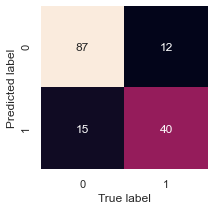

In [91]:
y_preds = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, # annote the boxes with conf_mat info
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel ('Predicted label')

plot_conf_mat(conf_mat)